<a href="https://colab.research.google.com/github/Rajatvs/ML-2/blob/main/Recognize_similarity_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== RESULTS ===
                                        text  cluster  \
0      Machine learning improves predictions        0   
1   Deep learning models use neural networks        0   
2  Artificial intelligence drives automation        0   
3                      Cats are cute animals        1   
4                    Dogs love playing fetch        0   
5              Pet animals require good care        1   

                          most_similar_text  
0  Deep learning models use neural networks  
1     Machine learning improves predictions  
2     Machine learning improves predictions  
3             Pet animals require good care  
4     Machine learning improves predictions  
5                     Cats are cute animals  


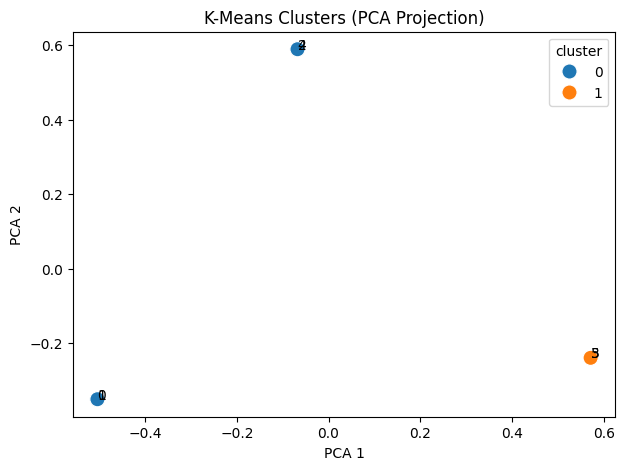

In [2]:
# ===========================
# ALL-IN-ONE K-MEANS + SIMILARITY + VISUALIZATION
# Google Colab Ready
# ===========================

# Install dependencies
!pip install scikit-learn numpy pandas matplotlib seaborn

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------
# 1. SAMPLE DATA (replace with your own)
# ------------------------------------------
texts = [
    "Machine learning improves predictions",
    "Deep learning models use neural networks",
    "Artificial intelligence drives automation",
    "Cats are cute animals",
    "Dogs love playing fetch",
    "Pet animals require good care",
]

df = pd.DataFrame({"text": texts})

# ------------------------------------------
# 2. VECTORIZE TEXT USING TF-IDF
# ------------------------------------------
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df["text"])

# ------------------------------------------
# 3. K-MEANS CLUSTERING
# ------------------------------------------
k = 2  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
df["cluster"] = kmeans.fit_predict(X)

# ------------------------------------------
# 4. COMPUTE COSINE SIMILARITY WITHIN CLUSTERS
# ------------------------------------------
similarity_matrix = cosine_similarity(X)
df["most_similar_text"] = ""

for i in range(len(df)):
    cluster = df.loc[i, "cluster"]
    cluster_indices = df[df["cluster"] == cluster].index

    scores = [(j, similarity_matrix[i][j])
              for j in cluster_indices if j != i]

    if scores:
        most_similar_index = max(scores, key=lambda x: x[1])[0]
        df.at[i, "most_similar_text"] = df.loc[most_similar_index, "text"]

print("\n=== RESULTS ===")
print(df)

# ------------------------------------------
# 5. VISUALIZE CLUSTERS USING PCA
# ------------------------------------------
pca = PCA(n_components=2)
coords = pca.fit_transform(X.toarray())

plt.figure(figsize=(7, 5))
sns.scatterplot(x=coords[:,0], y=coords[:,1],
                hue=df["cluster"], palette="tab10", s=120)

for i, txt in enumerate(df["text"]):
    plt.annotate(str(i), (coords[i,0], coords[i,1]))

plt.title("K-Means Clusters (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()
